### Import Libraries

In [64]:
import pandas as pd # Data processing 
import numpy as np 
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualisation
import missingno as msno # Missing Data - Data visualisation
from collections import Counter #Counting

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, chi2, RFE, mutual_info_classif

#classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

#### Load Data Set

In [65]:
# Load Dataset
cust_df = pd.read_csv('Customer-Churn.csv')
cust_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
# Dimensionality of the Data - The number of rows and columns
cust_df.shape 

(7043, 21)

In [67]:
# Examine the Columns of the Dataset
cust_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [68]:
# Get the data information/types
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [69]:
cust_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [70]:
# Investigate the missing values
cust_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

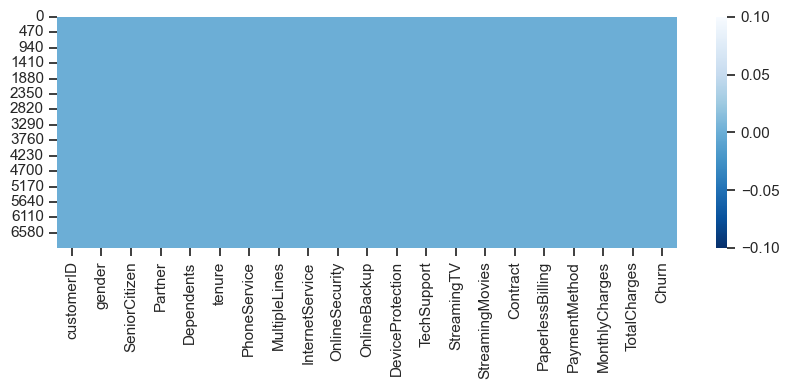

In [71]:
#visualise missing values
plt.figure(figsize=(10,3))
sns.heatmap(cust_df.isnull(), cbar=True, cmap="Blues_r")

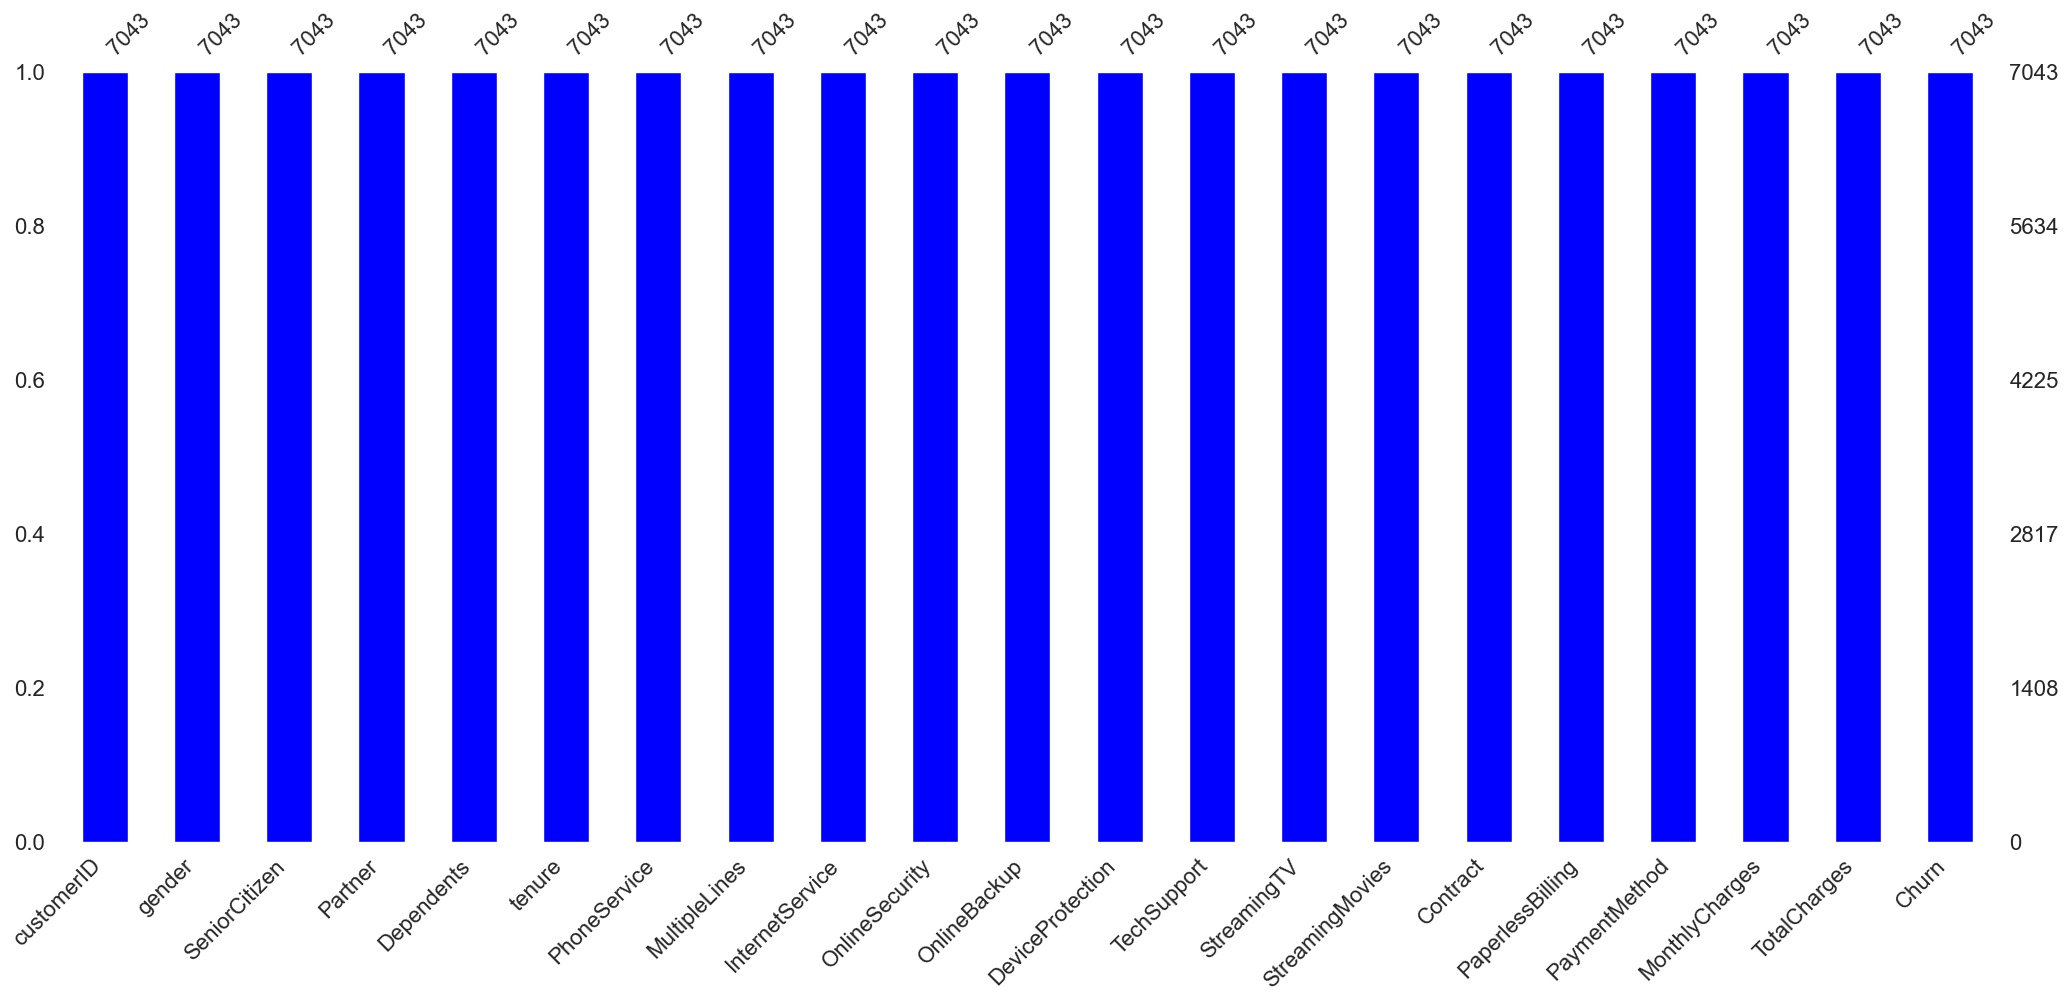

In [72]:
# visualise missing no
msno.bar(cust_df,color="blue");

In [73]:
# check for duplicates
cust_df.duplicated().sum()

0

In [74]:
# Remove duplicate rows, keeping the first occurrence
cust_df = cust_df.drop_duplicates()

In [75]:
# check for duplicates again
cust_df.duplicated().sum()

0

#### Ensuring TotalCharges is converted from an object to numerical value

In [76]:
# Explore TotalCharges column
cust_df.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [77]:
# Detect entries where TotalCharges is either NaN or contains blank values
nan_total_charges = cust_df[cust_df['TotalCharges'].isnull()]

# Display the rows where TotalCharges is NaN
nan_total_charges.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [78]:
# Detect rows where TotalCharges is non-numeric
non_numeric_total_charges = cust_df[cust_df['TotalCharges'].str.strip() == '']

# Display the problematic entries
non_numeric_total_charges.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [79]:
cust_df.loc[:, 'TotalCharges'] = pd.to_numeric(cust_df['TotalCharges'], errors='coerce')
cust_df.TotalCharges.isnull().sum()

11

In [80]:
# Check if any rows have missing 'TotalCharges' after conversion
missing_total_charges = cust_df[cust_df['TotalCharges'].isnull()]
print(missing_total_charges.isna().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


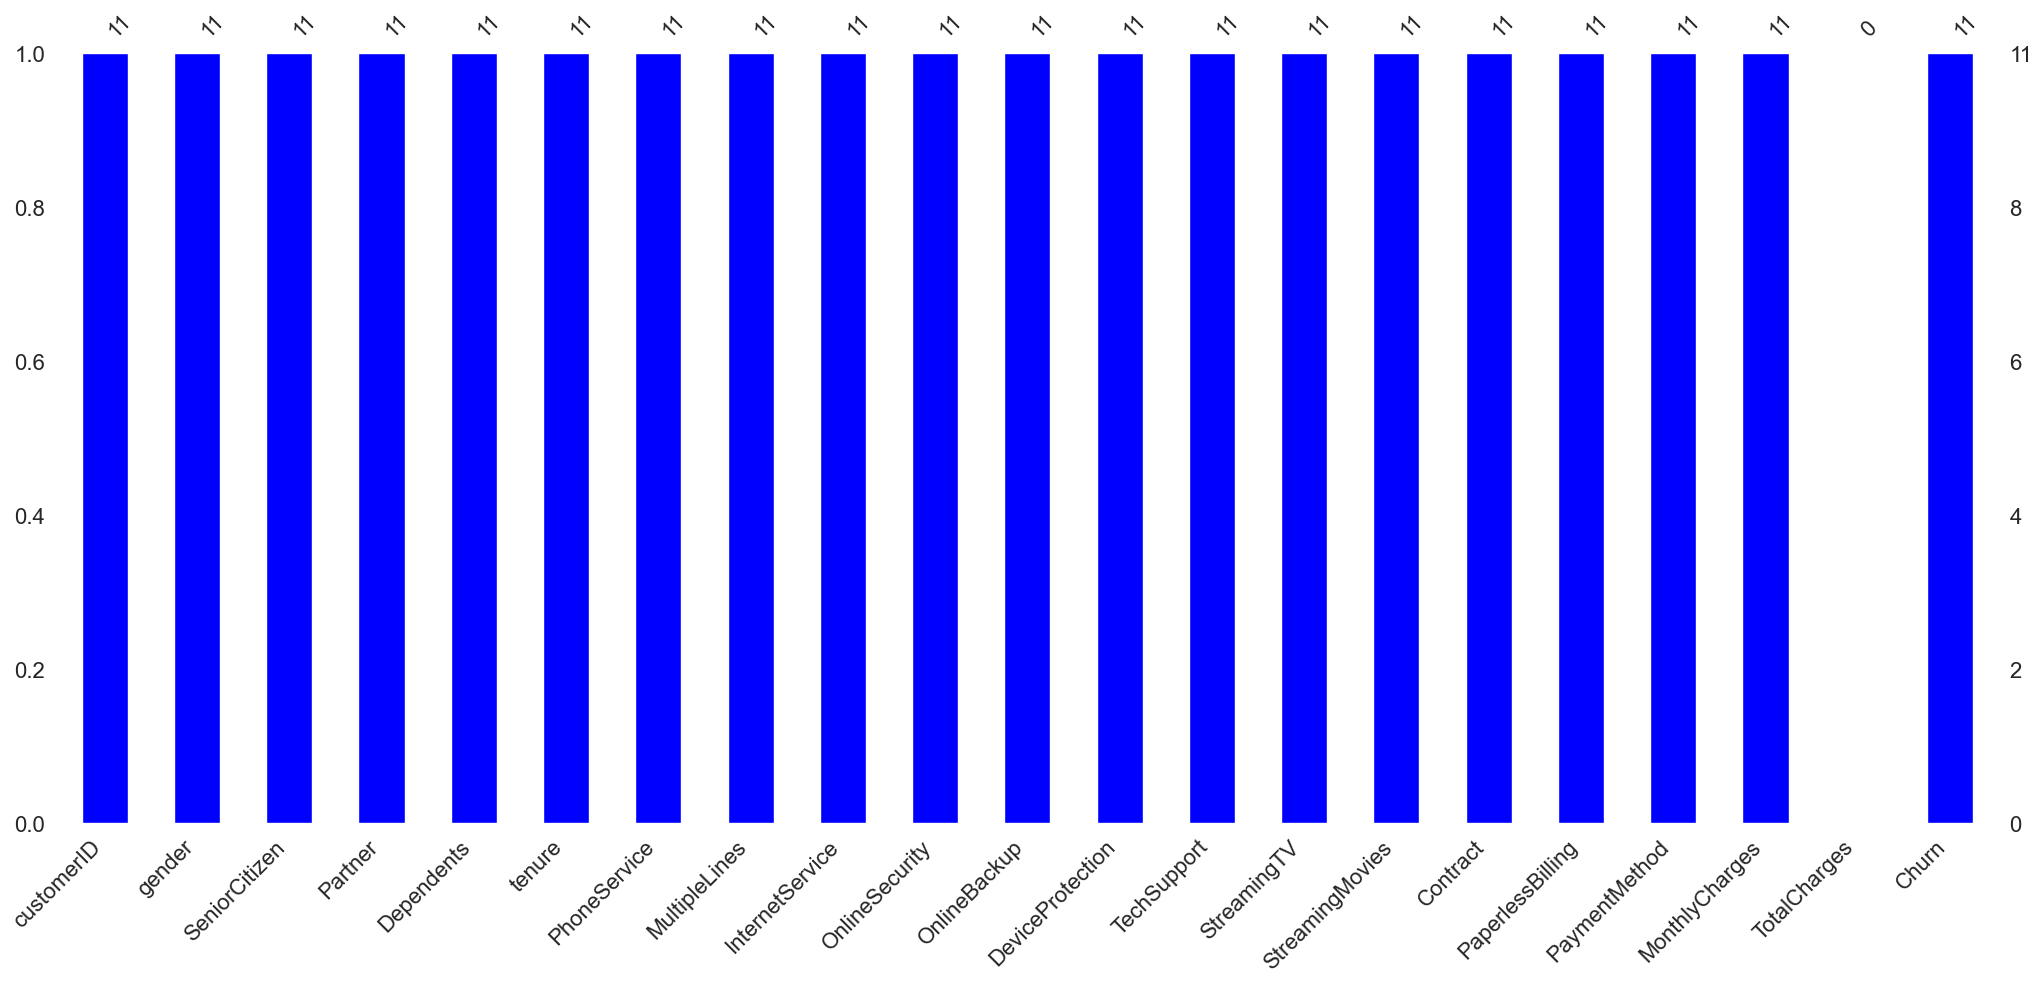

In [81]:
# visualise missing no
msno.bar(missing_total_charges,color="blue");

In [82]:
missing_total_charges.loc[missing_total_charges ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#### Data Cleaning to handle missing values

In [83]:
# This step has to be performed to address the 11 missing data from TotalCharges

# Drop rows where 'TotalCharges' is missing
cust_df = cust_df.dropna(subset=['TotalCharges'])

# Verify the conversion
cust_df['TotalCharges'] = cust_df['TotalCharges'].astype(float)

In [84]:
# data verification for anomalies and data types in TotalCharges After dropping missing values
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [85]:
# Drop irrelevant columns - The CustomerID column doesnot have any effect on the analysis, hence, it will be dropped
cust_df = cust_df.drop(['customerID'], axis = 1) # Drops specified labels from rows or columns.
cust_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:
# Check for duplicates
cust_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7032, dtype: bool

In [87]:
# Convert SeniorCitizen to Categorical feature/column

# SeniorCitizen as a Numerical feature
print(cust_df['SeniorCitizen'])

# Convert using .astype() Method
cust_df['SeniorCitizen'] = cust_df['SeniorCitizen'].astype('object')
cust_df['SeniorCitizen']

# Convert using the .replace() Method
cust_df['SeniorCitizen'] = cust_df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})
cust_df['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7032, dtype: int64


0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7032, dtype: object

In [88]:
# Convert Churn to Numerical feature/column

# Churn as a Categorical Feature (Yes/No)
print(cust_df['Churn'])

# Convert using the .replace() Method
cust_df['Churn'] = cust_df['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)
cust_df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [89]:
cust_df1 = cust_df
cust_df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [90]:
# Numerical Statistical Analysis of the clean data - Mean, Median, Standard Deviation, Max/Min, Interquartile Ranges.
cust_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
Churn,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00


#### Exploratory Data Analysis

##### Univariate Analysis

In [91]:
# Get the Numerical features in the dataset
all_numerical_features = cust_df1.select_dtypes(exclude = 'object')
all_numerical_features

# Exclude the Churn feature - To get the Univariate analysis of the independent numerical features only aside the target feature
numerical_features = all_numerical_features.drop(['Churn'], axis=1)
numerical_features.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


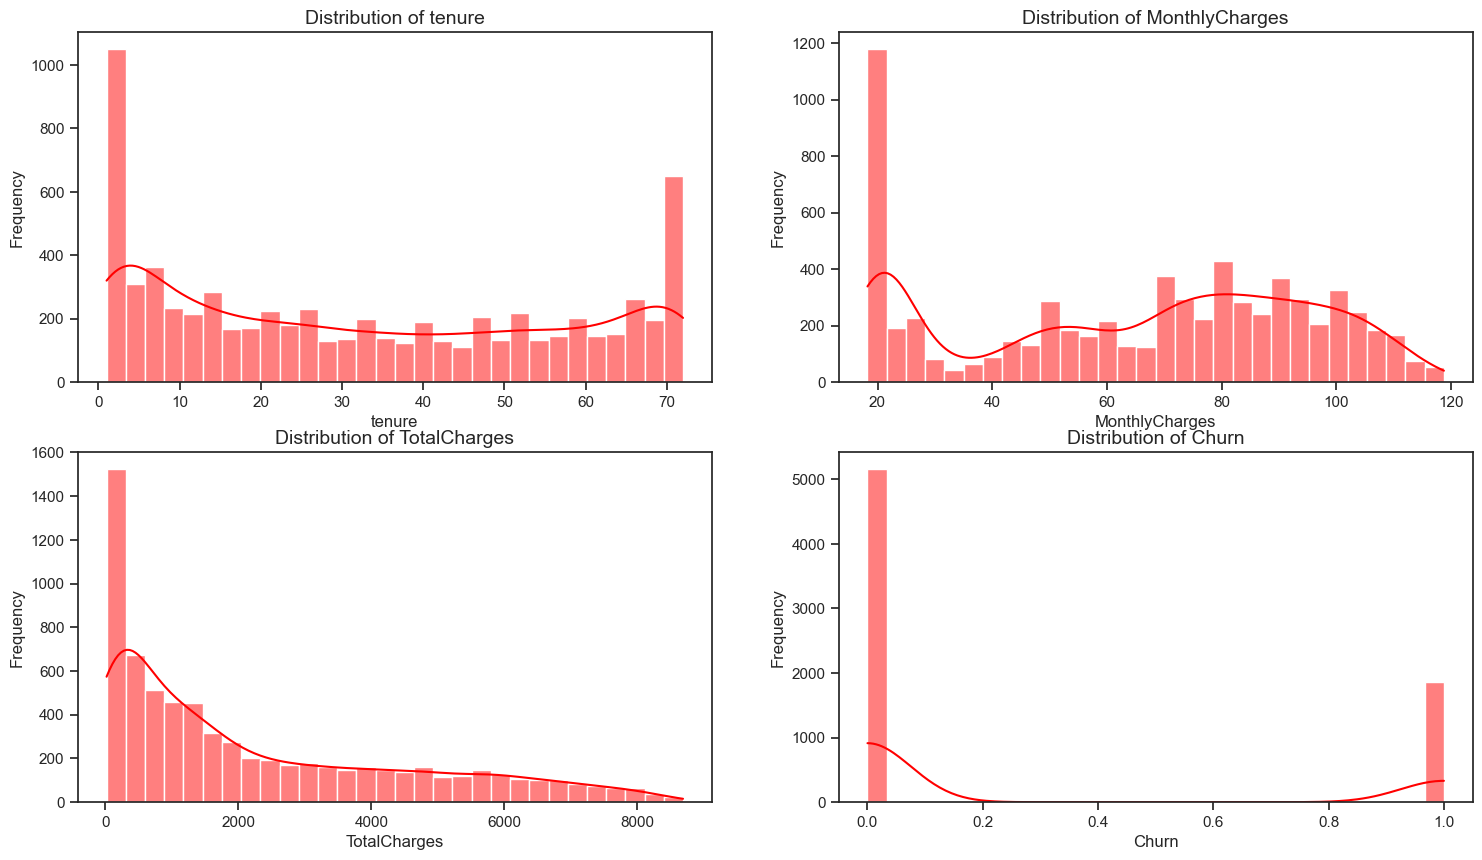

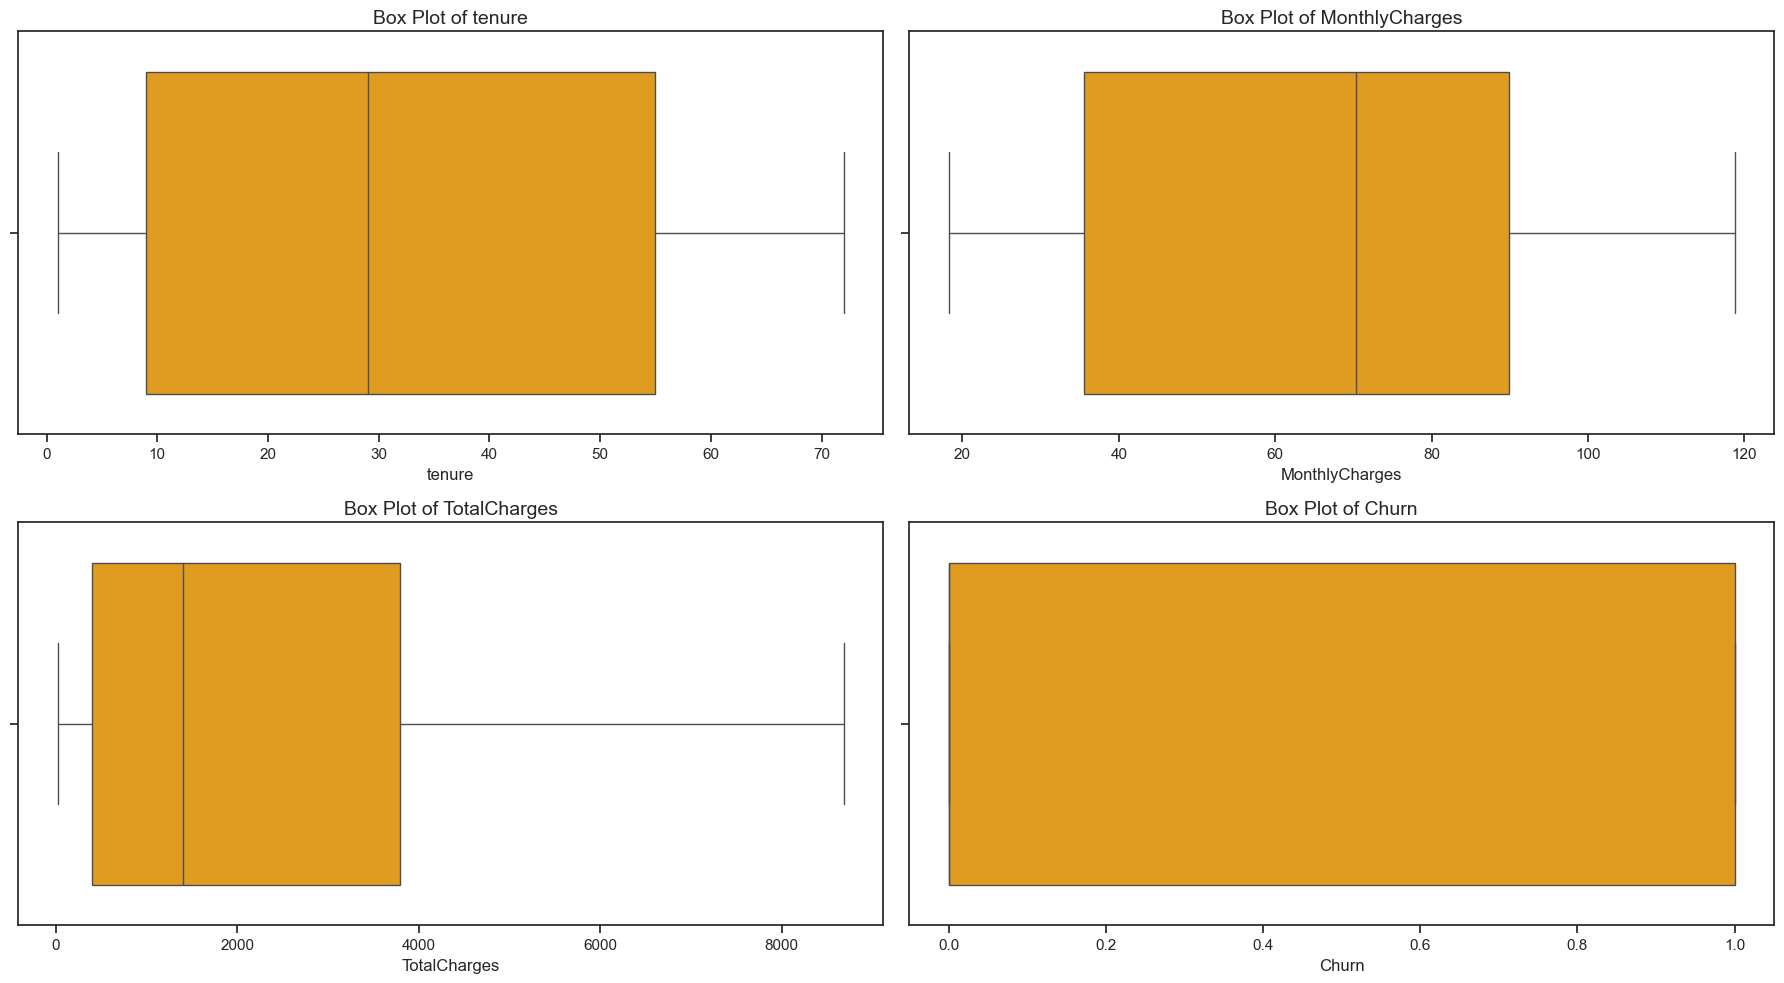

In [92]:
# Set up seaborn style with no gridlines
sns.set(style="ticks")  

# List of numerical features for univariate analysis
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Set up the plot grid for histograms and KDE plots 
plt.figure(figsize=(18, 10))

# Histograms and KDE plots for each numerical feature 
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(cust_df1[feature], kde=True, color='red', bins=30)
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.grid(False)  # Remove gridlines
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Set up the plot grid for box plots 
plt.figure(figsize=(18, 10))

# Create box plots for each numerical feature 
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=cust_df1, x=feature, color='orange')
    plt.title(f'Box Plot of {feature}', fontsize=14)
    plt.grid(False)  # Remove gridlines
    plt.xlabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

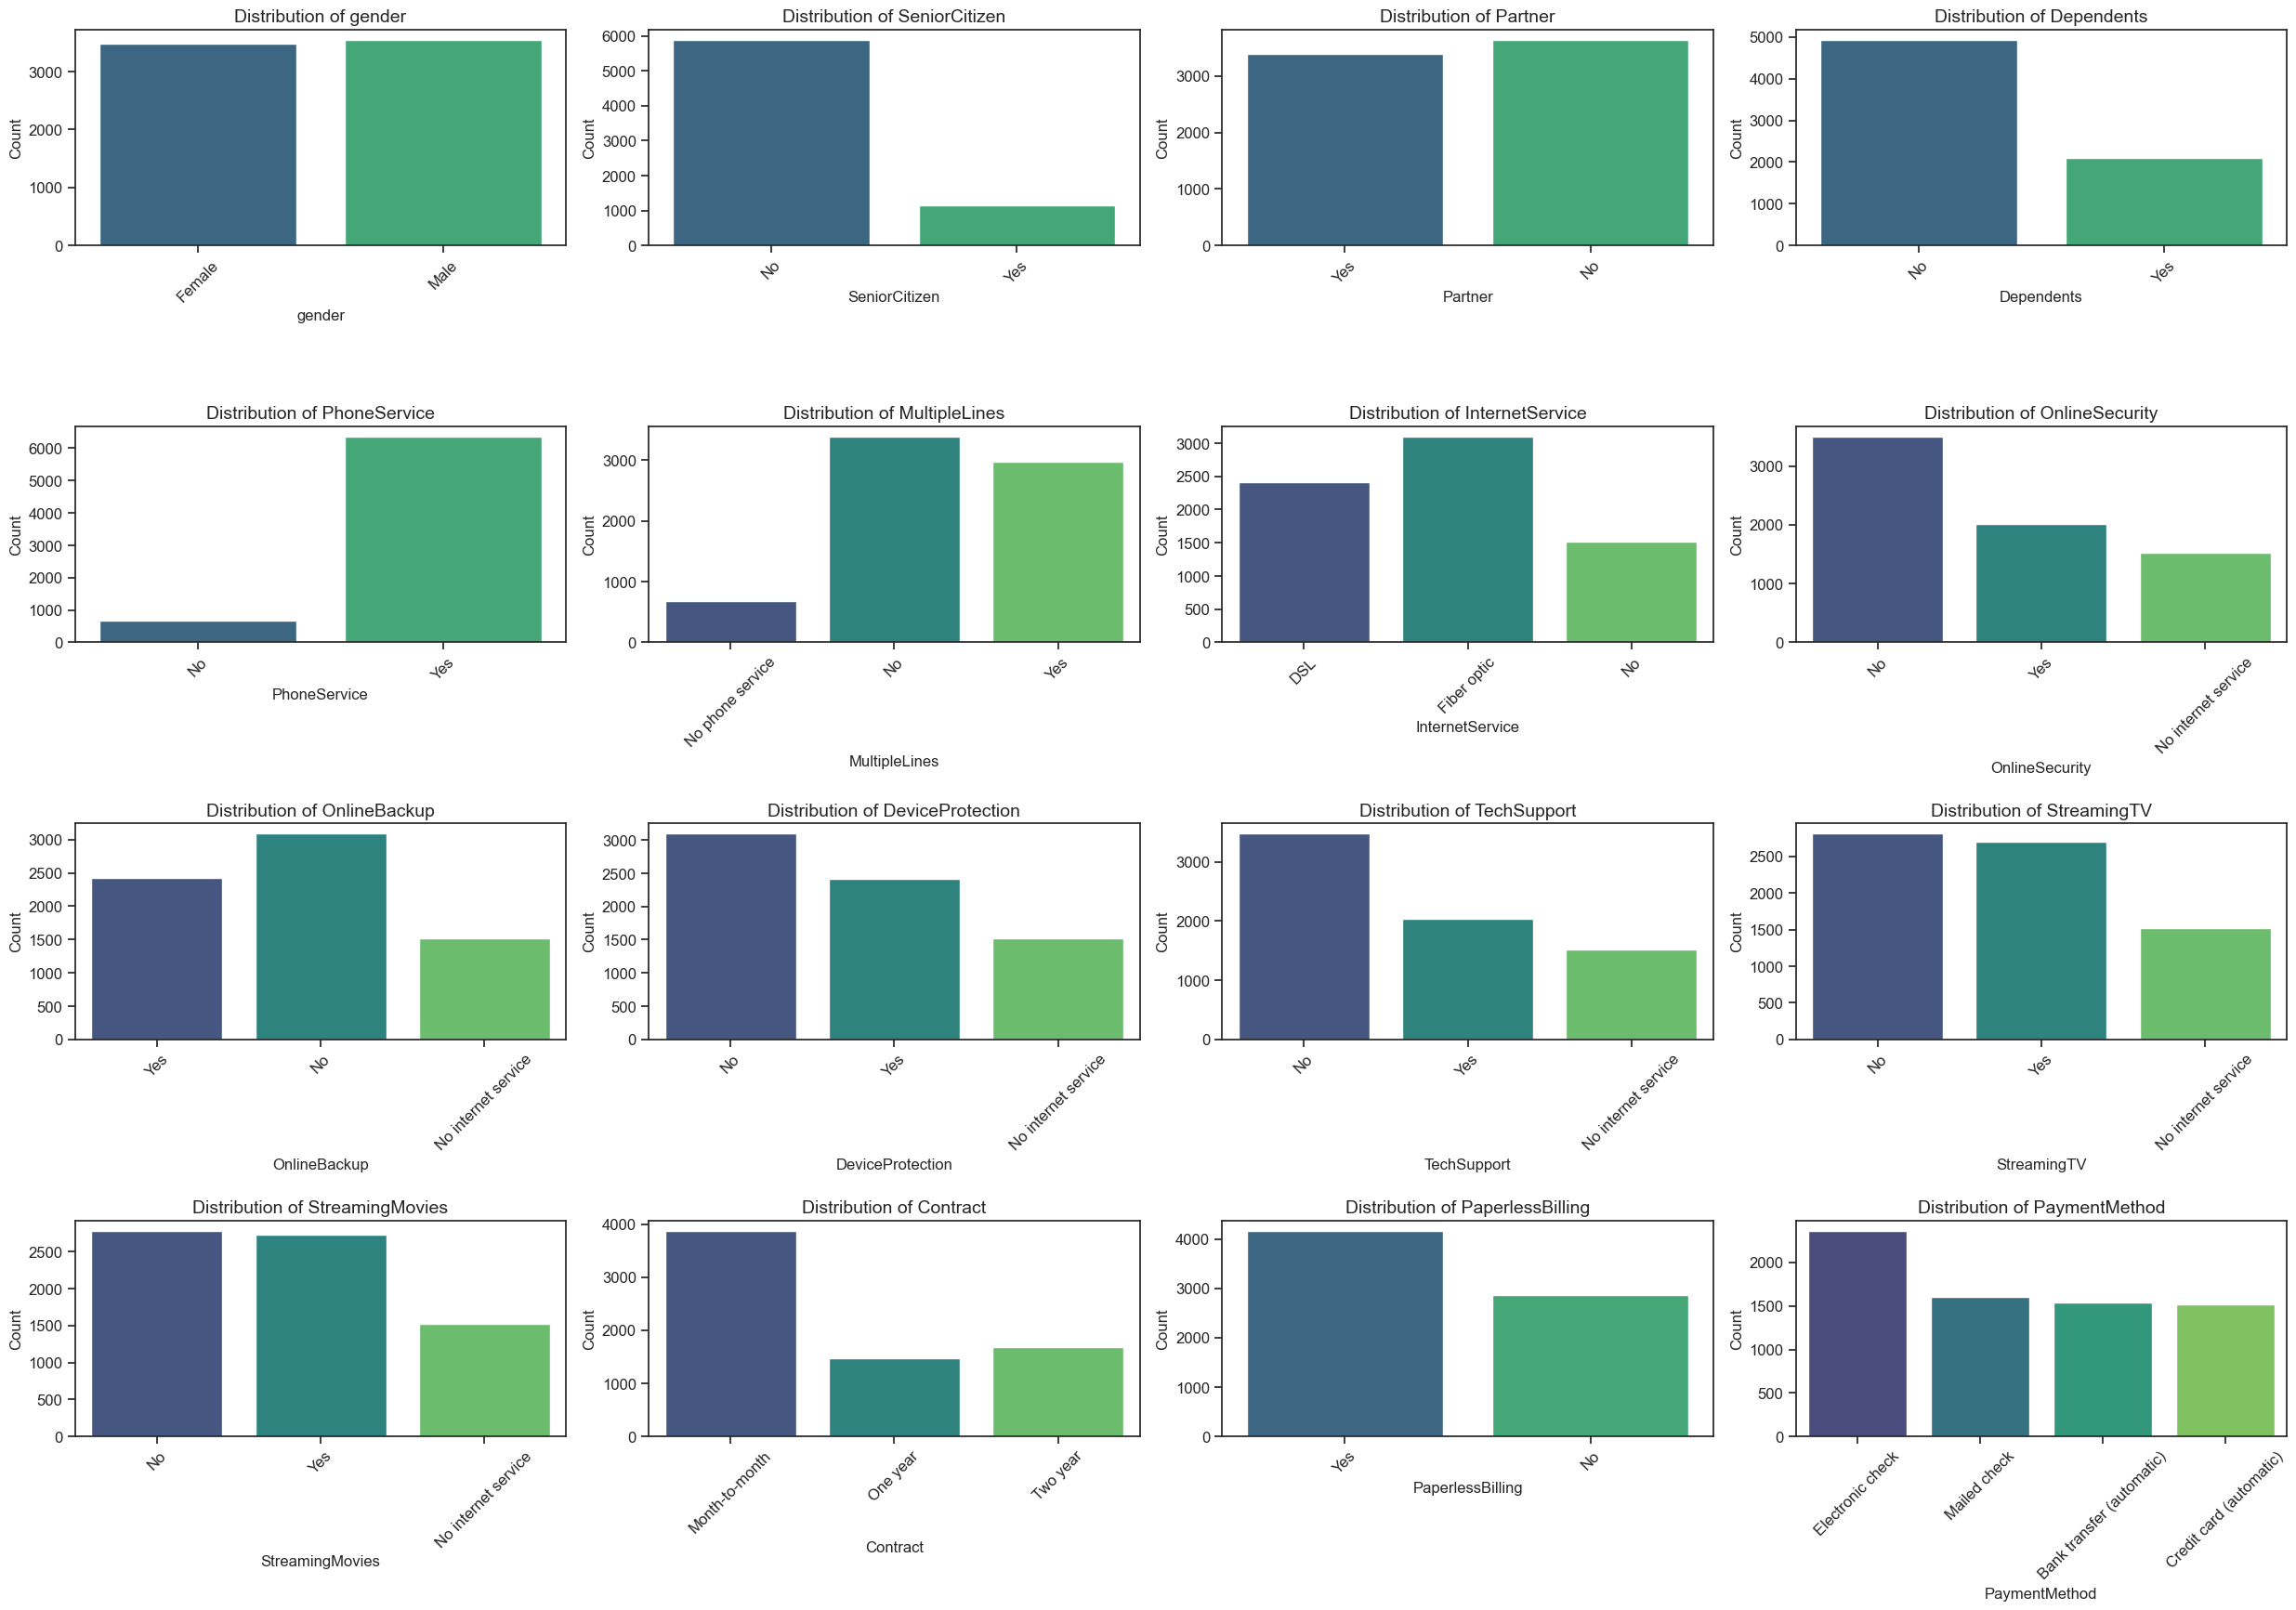

In [93]:
# List of all categorical features for univariate analysis
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

# Set up the plot grid
plt.figure(figsize=(25, 20))

# Create bar plots for each categorical feature 
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 4, i)  # layout
    
    sns.countplot(
        data=cust_df1,
        x=feature,
        hue=feature,          
        palette='viridis',
        legend=False
    )
    
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
plt.tight_layout()
plt.show()

#### Categorical Variable Analysis and Insights

• Gender: The customer base is almost evenly divided between male and female customers, with no significant imbalance. Since the gender distribution is nearly equal, gender alone is unlikely to be a strong predictor of churn.

• SeniorCitizen: Most customers are non-senior citizens, while a smaller percentage are senior citizens. Although senior citizens represent a minority, their churn behaviour may be worth examining separately, as their service needs and usage patterns may differ.

• Partner: A slightly larger share of customers do not have a partner. Partnered customers may exhibit different service usage habits and potentially lower churn rates, making this an important variable to explore in retention strategies.

• Dependents: The majority of customers do not have dependents, suggesting that many users may be subscribing for individual rather than family use. Customers with dependents may rely more heavily on family-focused services, which could impact engagement and churn patterns.

• Phone Service: Nearly all customers subscribe to Phone Service, with very few opting out. This variable may have limited predictive power on its own. Other service-related features may provide more insight into churn.

• Multiple Lines: The distribution is fairly balanced between customers with and without multiple lines. 

• Internet Service: Fiber optic is the most common internet service type, followed by DSL, while a small portion do not subscribe to internet service. Although fiber optic adoption is strong, its relationship with churn may depend on perceived value, service quality, and pricing.

• OnlineSecurity: A large share of customers do not subscribe to online security services. Encouraging adoption, possibly through bundled offerings, may improve customer stickiness, as customers with more services often exhibit lower churn.

• OnlineBackup: Most customers do not use online backup services. Promotional offers or bundled packages could increase usage, potentially enhancing engagement and reducing churn.

• DeviceProtection: A majority of customers do not subscribe to device protection, though a meaningful portion do. Promoting device protection could add value to customer plans and support long-term retention.

• Tech Support: Most customers do not have tech support services, with a smaller group opting in. Expanding tech support adoption may particularly benefit customers who need assistance, potentially reducing frustration and churn.

• Streaming TV and Streaming Movies: Subscriptions to streaming services are relatively evenly distributed across the customer base. Bundling streaming services may attract entertainment-focused customers and strengthen retention

• Contract: Month-to-month contracts are the most common, followed by one-year and two-year agreements. Customers with longer contracts typically show lower churn tendencies. Offering incentives to transition customers into longer-term contracts could improve retention.

• Paperless Billing: Most customers prefer paperless billing, while a smaller group continues using traditional billing. Customers opting for paperless billing may skew toward younger or more tech-savvy demographics, who may also be more prone to churn. Tailored engagement strategies may be needed for this segment.

• Payment Method: Electronic check is the most widely used payment method, with credit cards and bank transfers making up the remainder. Payment method may influence churn risk, as some payment types—like electronic checks—are associated with easier cancellation and potentially higher churn.

Overall Insight:
Customer retention during the first year is critical, as this group shows the highest churn risk. Contract type, service adoption (e.g., OnlineBackup, TechSupport, DeviceProtection), and tenure patterns appear to have the greatest impact on churn prediction. Meanwhile, more evenly distributed variables such as gender and PhoneService may play a smaller role. Bundling services, improving new-customer engagement, and offering early incentives may significantly strengthen retention.

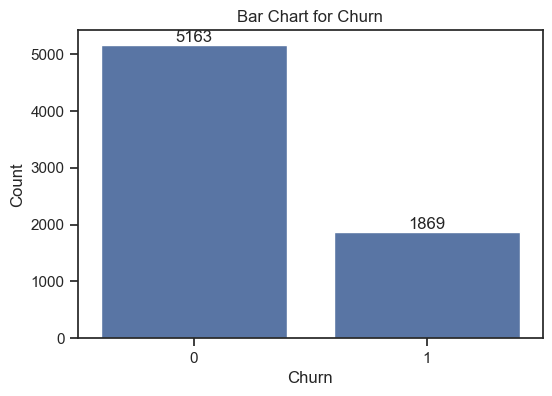

In [94]:
plt.figure(figsize=(6,4))

churn_counts = cust_df1['Churn'].value_counts()

ax = sns.barplot(
    x=churn_counts.index,
    y=churn_counts.values,
    color=None  
)

plt.title("Bar Chart for Churn")
ax.bar_label(ax.containers[0])
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [95]:
# Select all columns with categorical data types (object or category)
categorical_df = cust_df1.select_dtypes(include=['object', 'category'])

# Check the columns selected as categorical
print("Categorical Variables in categorical_df:")
print(categorical_df.columns)

Categorical Variables in categorical_df:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


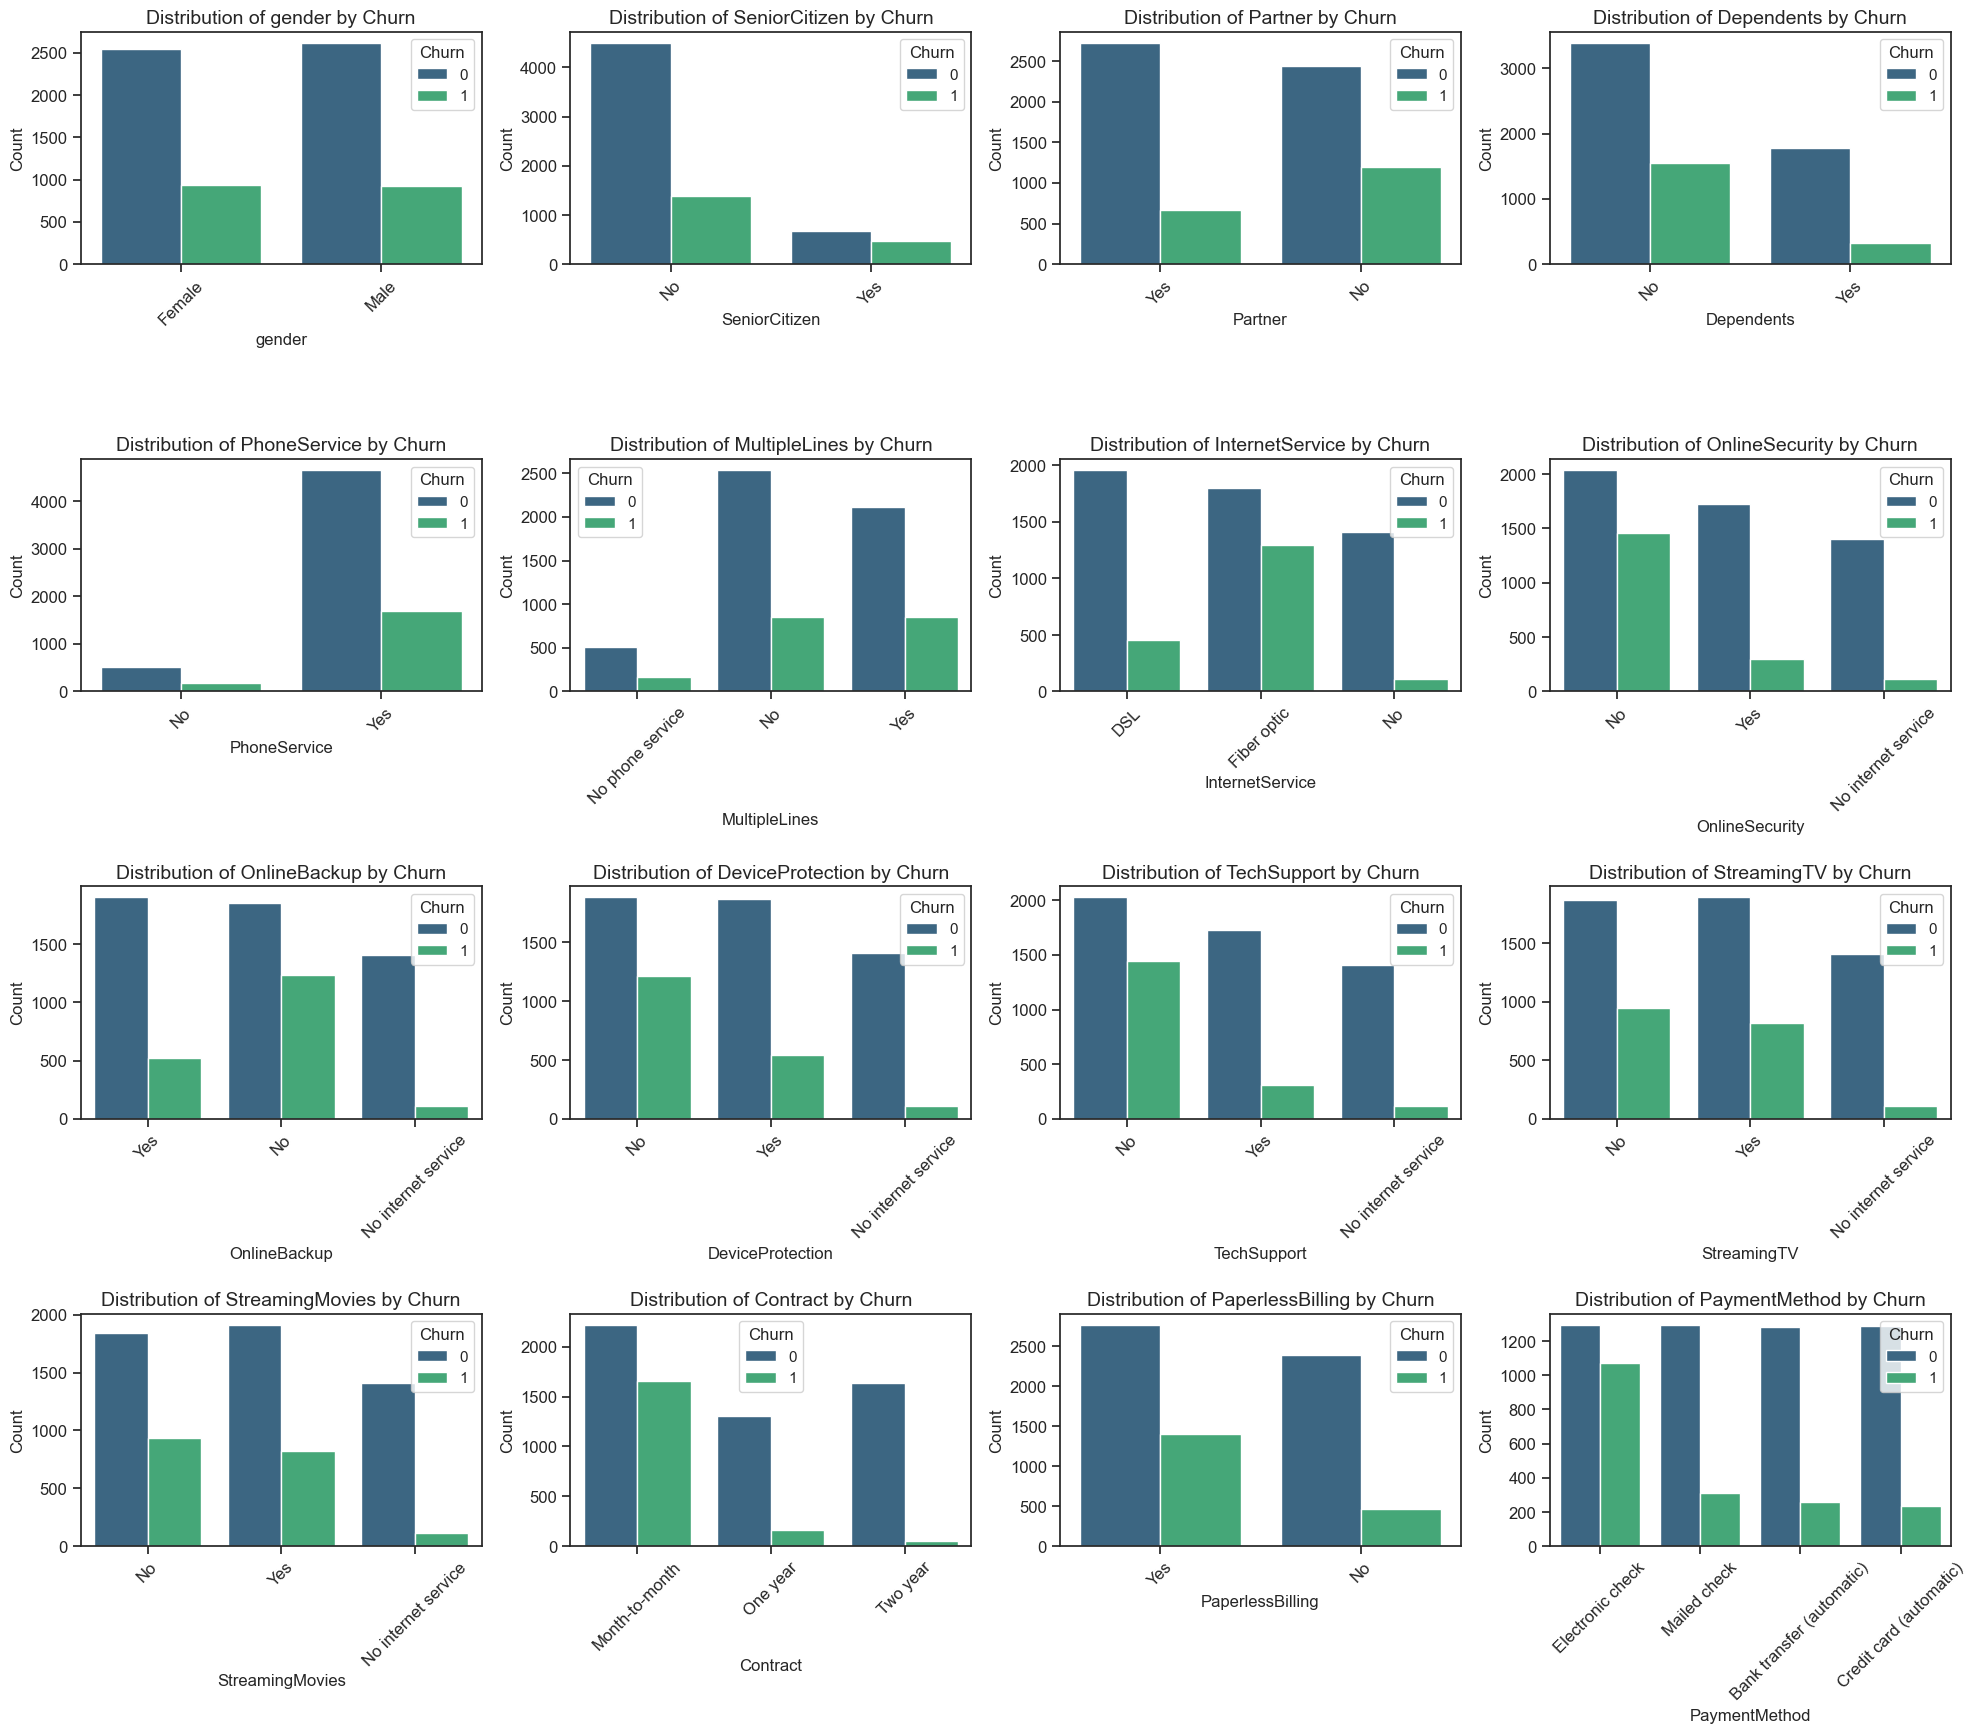

In [96]:
# List of all categorical features including tenure_group for univariate analysis
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

# Set up the plot grid
plt.figure(figsize=(20, 20))

# Create bar plots for each categorical feature with Churn as hue
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 4, i) 
    sns.countplot(data=cust_df1, x=feature, hue='Churn', palette='viridis')  
    plt.title(f'Distribution of {feature} by Churn', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
plt.tight_layout()
plt.show()

#### Observation

##### Churn Analysis by Categorical Features

• Gender: Churn rates among male and female customers are nearly identical. Insight: Gender does not appear to meaningfully influence churn and is unlikely to be a strong predictive factor.

• SeniorCitizen: Senior citizens exhibit a significantly higher churn rate compared to non-senior customers. Insight: Age plays an important role in churn behaviour, with senior citizens showing a greater likelihood of leaving the service.

• Partner: Customers without a partner churn at a higher rate than those who have one. Insight: Partnership status may contribute to retention, possibly due to shared usage, combined plans, or household service needs.

• Dependents: Customers without dependents are more likely to churn than those who have them. Insight: Having dependents may encourage broader service usage, increasing overall engagement and reducing churn.

• Phone Service: Churn rates are similar regardless of whether customers subscribe to Phone Service. Insight: Since the majority already have phone service, this feature alone does not appear to be a meaningful driver of churn.

• Multiple Lines: Customers with multiple lines churn slightly more than those without, though the difference is small. Insight: Adding multiple lines does not provide a strong retention advantage; its impact on churn appears limited.

• Internet Service: Fiber optic customers show higher churn compared to DSL users and those without internet service. DSL customers have the lowest churn rates. Insight: Higher churn among fiber users may reflect competitive pressure, pricing concerns, or dissatisfaction with premium service offerings.

• Online Security & Online Backup: Customers who do not subscribe to these services display higher churn rates. Insight: Encouraging adoption—through bundling or promotions—may increase engagement and lower churn by creating more value for the customer.

• Device Protection & Tech Support: Customers lacking device protection and tech support churn more frequently than those using these services. Insight: Subscribers to support-oriented services tend to stay longer, suggesting that add-on services strengthen customer commitment.

• Streaming TV & Streaming Movies: Customers who subscribe to streaming services experience slightly lower churn than those who do not. Insight: Entertainment bundles may play a positive role in customer retention and overall satisfaction.

• Contract: Month-to-month customers have dramatically higher churn rates than those on one- or two-year contracts. Insight: Contract length is one of the strongest predictors of churn. Increasing long-term contract adoption can substantially reduce customer turnover.

• Paperless Billing: Customers using paperless billing are slightly more likely to churn. Insight: This may reflect a more mobile or tech-savvy customer demographic that is less committed long-term.

• Payment Method: Electronic check users churn at a higher rate compared to customers using credit cards or bank transfers. Insight: Payment method may indicate churn risk, with electronic checks potentially offering lower friction for cancellation.

##### Key Takeaways
• Add-on services such as OnlineSecurity, DeviceProtection, and TechSupport improve retention by deepening customer involvement.

• Higher-risk groups include senior citizens, customers without dependents, and electronic check users.

• Fiber optic customers exhibit higher churn, potentially signalling competitive dissatisfaction or pricing sensitivity.

#### Numerical Bivariate Analysis

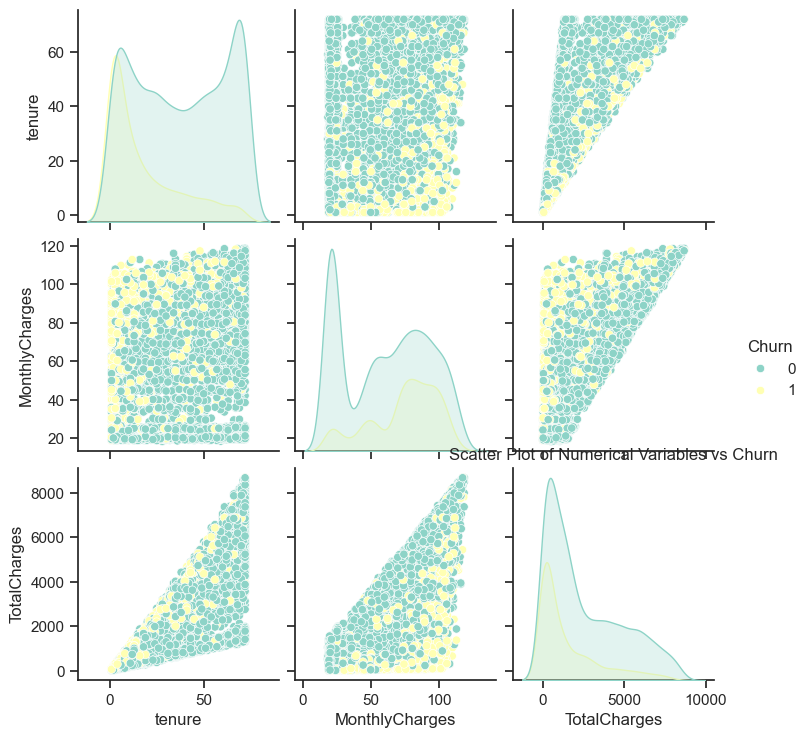

In [97]:
# List of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a pair plot (scatter plot for numerical vs numerical)
sns.pairplot(cust_df1[numerical_features + ['Churn']], hue='Churn', palette='Set3')
plt.title('Scatter Plot of Numerical Variables vs Churn')
plt.show()

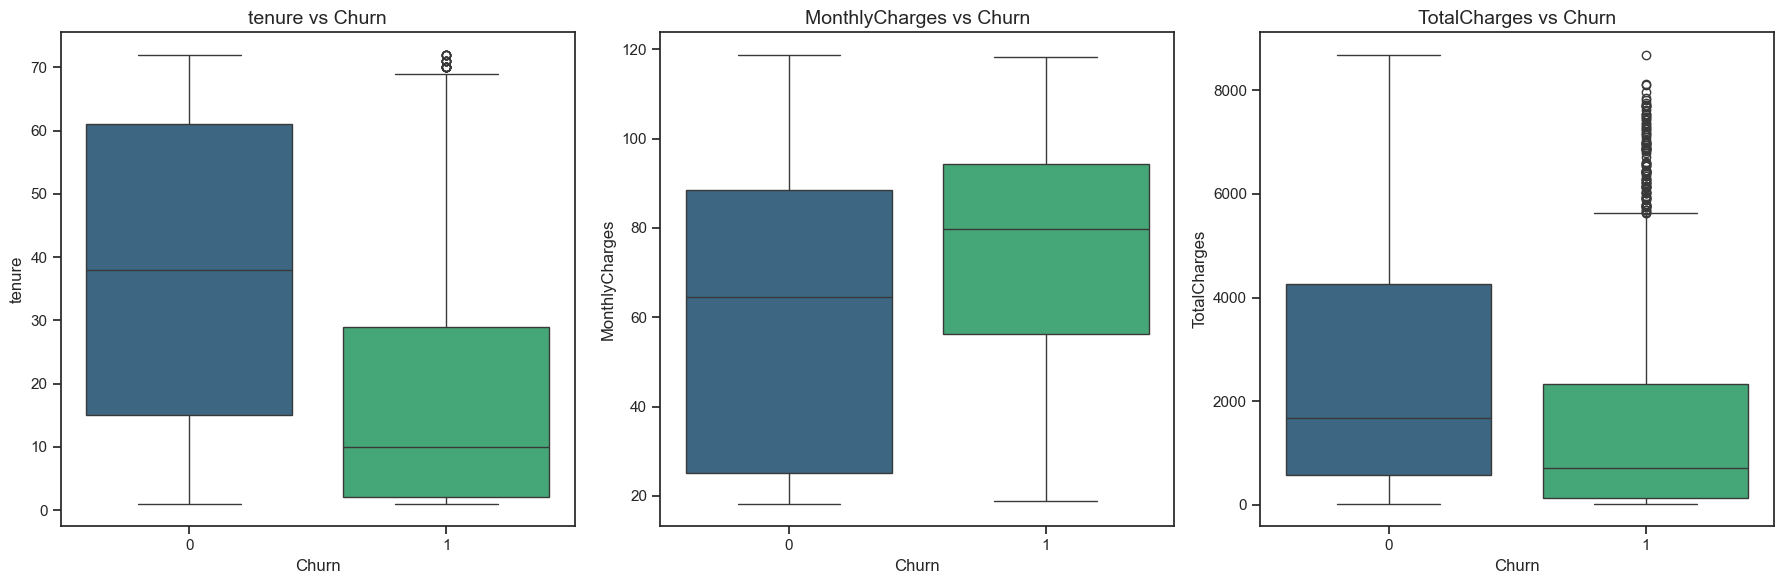

In [98]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(18, 6))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    
    sns.boxplot(
        data=cust_df1,
        x='Churn',
        y=feature,
        hue='Churn',
        palette='viridis',
        legend=False
    )
    
    plt.title(f'{feature} vs Churn', fontsize=14)
    plt.xlabel('Churn', fontsize=12)
    plt.ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

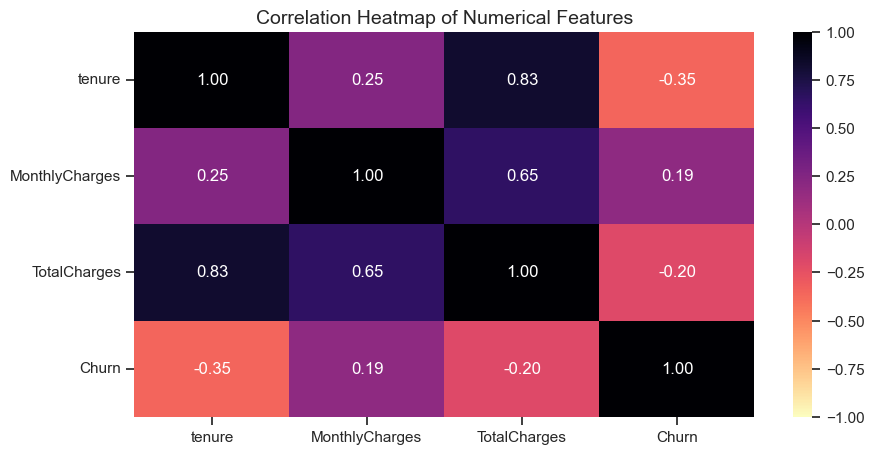

In [99]:
# Select the numerical columns from the DataFrame
numerical_cust_df1 = cust_df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(
    data=numerical_cust_df1.corr(),
    cmap='magma_r',
    annot=True,
    fmt='.2f',
    vmin=-1, vmax=1
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

#### Observations

##### Scatter Plot: Numerical Variables vs. Churn

Tenure vs. Churn:

• Customers who churn (Churn = 1) are heavily concentrated in the lower tenure range, indicating that churn is more common among newer customers.

• Customers who stay (Churn = 0) display a wider spread across mid to long tenures, reinforcing that longer-tenured customers are less likely to leave.

Monthly Charges vs. Churn:

• Churned customers tend to cluster in the higher MonthlyCharges range.

• Non-churned customers appear more evenly distributed across charges but are more common in the lower to mid-range.

• This suggests that higher monthly prices may contribute to customer dissatisfaction and churn.

Total Charges vs Churn:

• Because TotalCharges increase with length of service, churned customers naturally appear in the lower TotalCharges range.

• Non-churned customers typically accumulate higher TotalCharges due to longer service durations.

• This further supports the finding that short-tenure customers are more prone to churn.

##### Correlation Matrix Insights:

Tenure & TotalCharges (0.83): Strong positive correlation, longer-tenured customers accumulate higher total charges as expected.

Tenure & Monthly Charges (0.25): Weak correlation, the monthly amount customers pay is not strongly related to how long they have been with the company.

MonthlyCharges & TotalCharges (0.65): Moderate correlation, customers paying more per month tend to accumulate higher total charges but the relationship is not as strong as tenure’s impact.

In [100]:
numerical_df =cust_df1.select_dtypes(exclude = "object")
numerical_df.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,0
1,34,56.95,1889.50,0
2,2,53.85,108.15,1
3,45,42.30,1840.75,0
4,2,70.70,151.65,1


In [101]:
categorical_df = cust_df1.select_dtypes(include = "object")
categorical_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check


In [102]:
categorical_df
categorical_df.columns.to_list()
List_of_cat_column = categorical_df.columns.to_list()

for column in List_of_cat_column:
    print (categorical_df[column].unique())

['Female' 'Male']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [103]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for column_name in categorical_df:
    cust_df1[column_name]=encoder.fit_transform(cust_df1[column_name])
cust_df1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1


In [104]:
cust_df1.dtypes

gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [105]:
# Convert all boolean columns to integers (0 and 1)
cust_df1 = cust_df1.astype(int)

# Display the first few rows
cust_df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29,29,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56,1889,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53,108,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42,1840,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70,151,1


In [106]:
### Features and Label

# x = Features
# y = Label

In [107]:
x = cust_df1.drop(['Churn'], axis=1)
y = cust_df1['Churn']

In [108]:
x.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29,29
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56,1889
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53,108


In [109]:
y.head(3)

0    0
1    0
2    1
Name: Churn, dtype: int32

#### Encoding all Categorical variables

#### Data Splitting

In [110]:
print(f"Data contained {len(x)} records before splitting")

Data contained 7032 records before splitting


In [111]:
# Splitting Data into Training and Test sets 

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [112]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1413,1,0,1,1,65,1,2,1,2,2,2,2,0,0,2,0,1,94,6078
7003,1,0,0,0,26,0,1,0,0,0,2,2,0,0,0,0,2,35,1022
3355,0,0,1,0,68,1,2,1,0,2,2,2,0,0,2,0,1,90,6297
4494,1,0,0,0,3,1,0,1,0,2,0,0,0,2,0,0,2,84,235
3541,0,0,1,0,49,0,1,0,2,0,0,0,2,0,0,0,0,40,2070


In [113]:
xtest.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
974,0,0,1,1,59,1,0,0,0,2,0,2,2,2,2,1,1,75,4542
619,0,0,0,0,7,1,2,1,0,2,0,0,0,0,0,1,0,78,522
4289,0,0,0,0,54,1,0,2,1,1,1,1,1,1,2,0,3,20,1079
3721,0,0,0,0,2,1,0,2,1,1,1,1,1,1,0,0,3,20,38
4533,0,0,1,0,71,1,2,1,0,2,2,0,2,2,2,1,0,105,7555


In [114]:
len(xtest) == len(ytest)

True

In [115]:
len(xtrain) == len(ytrain)

True

#### Initialize Models

In [116]:
# Initialize models

Classifiers = [[SGDClassifier(random_state = 42), 'sdg_model'], 
               [DecisionTreeClassifier(random_state = 42), 'dt_model'], 
               [LogisticRegression(random_state = 42, max_iter=5000),'lr_model'], 
               [RandomForestClassifier(random_state = 42), 'rf_model'],
               [XGBClassifier(random_state = 42), 'xgb_model']
              ]

In [117]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Initialize Scaler
scaler = MinMaxScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

#### Hyperparameter Tuning

In [118]:
from scipy.stats import loguniform
from scipy.stats import randint
from scipy.stats import uniform, randint

models_params = {
    "SDGClassifier": (SGDClassifier(random_state = 42),{
        'loss': ['hinge', 'log_loss', 'modified_huber'],
        'max_iter': [1000, 2000, 3000, 4000, 5000],  
        'alpha': np.logspace(-5, 0, 6),              
        'learning_rate': ['optimal', 'adaptive', 'constant'],
        'penalty': ['l2', 'l1', 'elasticnet'],
        'eta0': loguniform(1e-4, 1e-1),
        'class_weight':[{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:4}]
    }),
    "DecisionTreeClassifier": (DecisionTreeClassifier(random_state=42), {
        'criterion': ['gini', 'entropy', 'log_loss'],   
        'max_depth': randint(1, 20),             
        'min_samples_split': randint(2, 20),                
        'min_samples_leaf': randint(1, 20),               
        'max_features': [None, 'sqrt', 'log2'],
        'class_weight':[{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:4}]
    }),
     "LogisticRegression": (LogisticRegression(max_iter=5000), {   
        'C': loguniform(1e-3, 1e3), 
        'solver': ['liblinear', 'lbfgs', 'saga'],
        'l1_ratio': np.linspace(0, 1, 5),
        'max_iter': [100, 500, 1000],
        'penalty': ['elasticnet'],   
        'class_weight':[{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:4}]
    }),
    "RandomForest": (RandomForestClassifier(random_state=42), {
        "n_estimators": randint(50, 300),
        "max_depth": randint(3, 30),
        "min_samples_split": randint(2, 20),
        "min_samples_leaf": randint(1, 20), 
        "max_features": ["sqrt", "log2", None], 
        "bootstrap": [True, False],  
        "criterion": ["gini", "entropy", "log_loss"],
        'class_weight':[{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:4}]
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), {
        'n_estimators': randint(100, 1000),
        'max_depth': randint(3, 15),
        'learning_rate': uniform(0.01, 0.3),        
        'subsample': uniform(0.5, 0.5),              
        'colsample_bytree': uniform(0.5, 0.5),       
        'gamma': uniform(0, 5),                      
        'reg_alpha': uniform(0, 1),                  
        'reg_lambda': uniform(0, 1), 
        'scale_pos_weight': randint(1, 10)
    })
}  

#### Feature Selection Methods

In [119]:
feature_selectors = {}
# 1. Univariate (SelectKBest)
skb = SelectKBest(score_func=chi2, k=10)
skb.fit(xtrain_scaled, ytrain)
feature_selectors['SelectKBest'] = xtrain.columns[skb.get_support()]

# 2. RFE with Logistic Regression
rfe = RFE(LogisticRegression(max_iter=1000), n_features_to_select=10)
rfe.fit(xtrain_scaled, ytrain)
feature_selectors['RFE'] = xtrain.columns[rfe.support_]

# 3. Random Forest Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain_scaled, ytrain)
rf_features = xtrain.columns[np.argsort(rf.feature_importances_)[-10:]]
feature_selectors['RandomForest_Importance'] = rf_features

# 4. L1 Regularization (Lasso)
lasso = Lasso(alpha=0.001, max_iter=10000)
lasso.fit(xtrain_scaled, ytrain)
lasso_features = xtrain.columns[np.abs(lasso.coef_) > 1e-4]
feature_selectors['L1_Lasso'] = lasso_features
 
# 5. Mutual Information
mi = mutual_info_classif(xtrain_scaled, ytrain)
mi_features = xtrain.columns[np.argsort(mi)[-10:]]
feature_selectors['Mutual_Info'] = mi_features

#### Training and evaluating models

In [128]:
results = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for method, features in feature_selectors.items():
    print(f"\n Feature Selection: {method}")
    xtrain_fs, xtest_fs = xtrain[features], xtest[features]
    
    for name, (model, params) in models_params.items():
        print(f"Training {name} ...")
        grid = RandomizedSearchCV(model, params, n_iter=20, cv=cv, scoring='accuracy', n_jobs=-1)
        grid.fit(xtrain_fs, ytrain)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(xtest_fs)
        acc = accuracy_score(ytest, y_pred)
        pre = precision_score(ytest, y_pred)
        recall = recall_score(ytest, y_pred)
        f1 = f1_score(ytest, y_pred)
        
        results.append({
            "Feature_Selection": method,
            "Model": name,
            "Best_Params": grid.best_params_,
            "Accuracy": acc,
            "Precision": pre,
            "Recall": recall,
            "F1_Score": f1
        })


 Feature Selection: SelectKBest
Training SDGClassifier ...
Training DecisionTreeClassifier ...
Training LogisticRegression ...
Training RandomForest ...
Training XGBoost ...

 Feature Selection: RFE
Training SDGClassifier ...
Training DecisionTreeClassifier ...
Training LogisticRegression ...
Training RandomForest ...
Training XGBoost ...

 Feature Selection: RandomForest_Importance
Training SDGClassifier ...
Training DecisionTreeClassifier ...
Training LogisticRegression ...
Training RandomForest ...
Training XGBoost ...

 Feature Selection: L1_Lasso
Training SDGClassifier ...
Training DecisionTreeClassifier ...
Training LogisticRegression ...
Training RandomForest ...
Training XGBoost ...

 Feature Selection: Mutual_Info
Training SDGClassifier ...
Training DecisionTreeClassifier ...
Training LogisticRegression ...
Training RandomForest ...
Training XGBoost ...


In [130]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("\nModel Performance Summary:")
results_df


Model Performance Summary:


,Feature_Selection,Model,Best_Params,Accuracy,Precision,Recall,F1_Score
0,RandomForest_Importance,XGBoost,"{'colsample_bytree': 0.5755373803443256, 'gamm...",0.789623,0.630000,0.505348,0.560831
1,L1_Lasso,RandomForest,"{'bootstrap': True, 'class_weight': {0: 1, 1: ...",0.783937,0.574786,0.719251,0.638955
2,RandomForest_Importance,RandomForest,"{'bootstrap': True, 'class_weight': {0: 1, 1: ...",0.780384,0.579853,0.631016,0.604353
3,Mutual_Info,XGBoost,"{'colsample_bytree': 0.9666480241921565, 'gamm...",0.774698,0.588785,0.505348,0.543885
4,RFE,RandomForest,"{'bootstrap': True, 'class_weight': {0: 1, 1: ...",0.773276,0.563805,0.649733,0.603727
5,L1_Lasso,XGBoost,"{'colsample_bytree': 0.70829324737404, 'gamma'...",0.773276,0.581121,0.526738,0.552595
6,SelectKBest,XGBoost,"{'colsample_bytree': 0.8097564761674406, 'gamm...",0.771855,0.581040,0.508021,0.542083
7,Mutual_Info,RandomForest,"{'bootstrap': True, 'class_weight': {0: 1, 1: ...",0.764748,0.545648,0.687166,0.608284
8,SelectKBest,RandomForest,"{'bootstrap': True, 'class_weight': {0: 1, 1: ...",0.759062,0.537155,0.676471,0.598817
9,RFE,XGBoost,"{'colsample_bytree': 0.5770494818391974, 'gamm...",0.756930,0.534043,0.671123,0.594787


##### Observation
The table represents a comparison of multiple machine learning models, each trained using different feature selection techniques and hyperparameter configurations. The goal is to identify which model-feature selection combination achieves the best predictive performance for churn classification 

XGBoost model outperformed other models as it consistently ranks among the top performers across different feature selection methods (RFE, Mutual Information, L1_Lasso, and SelectKBest).

In [131]:
### Best parameters for best performing model XGBoost
results_df.loc[0, 'Best_Params']

{'colsample_bytree': 0.5755373803443256,
 'gamma': 4.600672507981618,
 'learning_rate': 0.02732887817908896,
 'max_depth': 9,
 'n_estimators': 891,
 'reg_alpha': 0.8037340442272062,
 'reg_lambda': 0.2926058736089068,
 'scale_pos_weight': 1,
 'subsample': 0.9446378066763585}

In [132]:
### Best Parameters for all models

best_params_all = dict(zip(results_df['Model'], results_df['Best_Params']))
best_params_all

{'XGBoost': {'colsample_bytree': 0.5770494818391974,
  'gamma': 4.448770506854577,
  'learning_rate': 0.042266661575668135,
  'max_depth': 11,
  'n_estimators': 424,
  'reg_alpha': 0.32876174600112296,
  'reg_lambda': 0.8750244703186035,
  'scale_pos_weight': 2,
  'subsample': 0.9941587361136399},
 'RandomForest': {'bootstrap': True,
  'class_weight': {0: 1, 1: 2},
  'criterion': 'entropy',
  'max_depth': 26,
  'max_features': 'log2',
  'min_samples_leaf': 5,
  'min_samples_split': 11,
  'n_estimators': 110},
 'DecisionTreeClassifier': {'class_weight': {0: 1, 1: 3},
  'criterion': 'gini',
  'max_depth': 4,
  'max_features': None,
  'min_samples_leaf': 14,
  'min_samples_split': 16},
 'SDGClassifier': {'alpha': 0.0001,
  'class_weight': {0: 1, 1: 2},
  'eta0': 0.058927763716085775,
  'learning_rate': 'adaptive',
  'loss': 'log_loss',
  'max_iter': 1000,
  'penalty': 'l2'},
 'LogisticRegression': {'C': 0.002677931113513932,
  'class_weight': {0: 1, 1: 2},
  'l1_ratio': 0.5,
  'max_iter':

#### Model interpretability

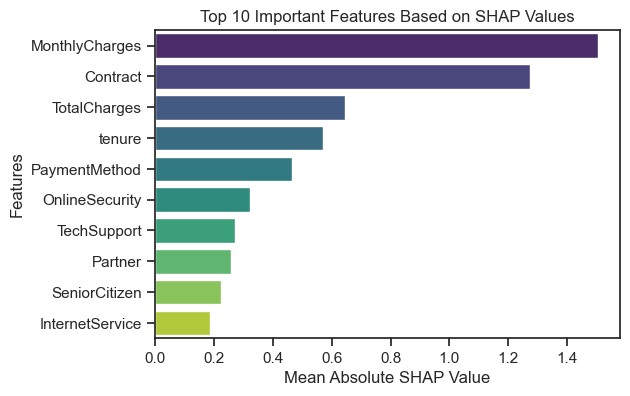

In [133]:
# --- SHAP Analysis for XGBoost ---

import shap

# Train a fresh XGBoost model for SHAP or use your best model
xgb_model = XGBClassifier(eval_metric='logloss', n_estimators=300)
xgb_model.fit(xtrain, ytrain)


# TreeExplainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(xtest_scaled)

# Convert SHAP values to DataFrame, using the original feature names from xtest (before scaling)
# xtest was the original DataFrame before scaling
shap_df = pd.DataFrame(shap_values, columns=xtest.columns)

# Compute mean absolute SHAP values for feature importance
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)

# Plot top 5 features
plt.figure(figsize=(6, 4))
sns.barplot(x=mean_shap_values[:10], y=mean_shap_values.index[:10], palette="viridis")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Features")
plt.title("Top 10 Important Features Based on SHAP Values")
plt.show()

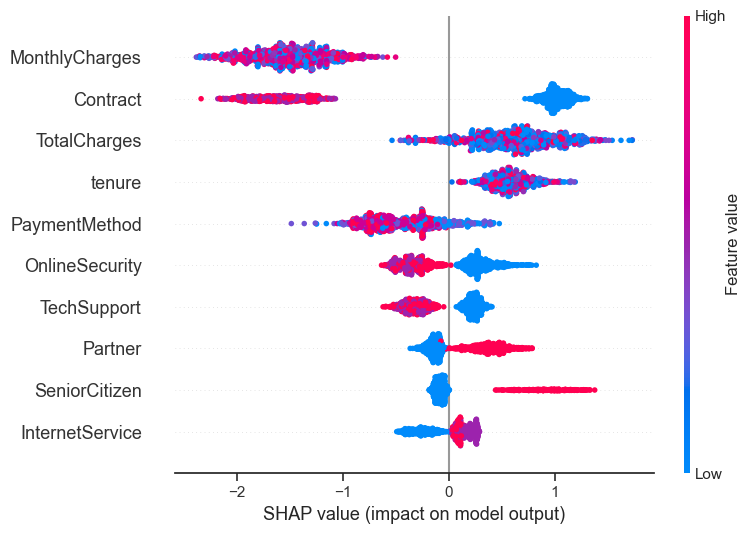

In [134]:
# Detailed summary plot showing only the top 10 features, using the original DataFrame with feature names
shap.summary_plot(shap_values, pd.DataFrame(xtest_scaled, columns=xtest.columns), max_display=10)

The SHAP (SHapley Additive exPlanations) analysis was conducted to enhance interpretability of the XGBoost churn prediction model and to quantify the marginal contribution of each feature to the predicted churn probability. The resulting SHAP summary plot provides a comprehensive visualization of feature importance

•	Monthly Charges: Monthly Charges emerged as the most influential predictor. Observations with higher monthly fees (represented by red markers) consistently exhibited positive SHAP values, thereby increasing the predicted probability of churn. Conversely, lower charges (blue markers) contribute negatively to SHAP values and reduce churn likelihood.

•	Contract Type: This is the second most salient predictor. Month-to-month customers demonstrate markedly positive SHAP contributions, indicating elevated churn risk.

•	Tenure and Total Charges: jointly, these highlight the vulnerability of newer customers. Low tenure and low accumulated charges both push the model toward predicting churn, confirming that customers in their early months are the most at risk. As customers stay longer, their churn likelihood declines steadily, reflecting deepening loyalty over time.

•	Payment Method: Electronic check users exhibit consistently positive SHAP values, signaling a substantially increased likelihood of churn relative to other payment modalities such as bank transfers or credit cards.

•	Service-related features further refine churn patterns. Customers lacking Online Security or Tech Support consistently show higher churn risk, implying that value-added services improve engagement and satisfaction. Similarly, Internet Service type shows that fiber optic users—often associated with higher monthly charges—have elevated churn, possibly linked to competition or performance expectations.

Finally, demographic features such as Partner status and Senior Citizen contribute moderately but are far less influential than financial, contract, and service-related factors.

Overall, the SHAP insights confirm that churn is predominantly driven by pricing, customer tenure, contract structure, payment method, and service engagement. These findings provide a strong foundation for targeted, data-driven retention interventions.